In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/MyDrive/Accredian')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('Fraud.csv')

**Data Cleaning**

**Handling Missing Values**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
null_counts = df.isnull().sum()
print(null_counts)

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


**As there as no null values ,handling them is not required.**

In [ ]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:
del df['type']
del df['nameOrig']
del df['nameDest']

**Handling Multicollinearity**

Text(0.5, 1.0, 'Correlation Heatmap')

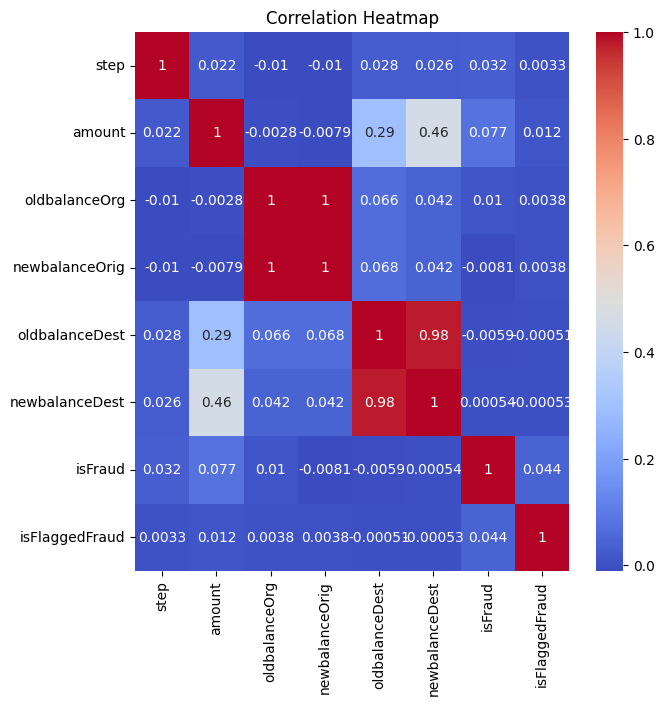

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_df = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(7,7))
sns.heatmap(numerical_df.corr(), annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap')


**As oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest are important features for determining fraud transactions , I am not deleting any one of them**

In [ ]:
numerical_df = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10,10))
numerical_df.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


<Figure size 1000x1000 with 0 Axes>

**Train_Test_Split the dataset**

In [ ]:
from sklearn.model_selection import train_test_split

#'isFraud' is the target variable
X = df.drop('isFraud', axis=1)  # Features
y = df['isFraud']  # Target variable

# Split the data into training set and test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Model Building**

**Random Forest Classifier**

In [ ]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score as a

# Create Random Forest Classifier
rf = RandomForestClassifier(n_estimators=2, random_state=42)

# Fit the model
rf.fit(x_train, y_train)

# Use the trained model to make predictions
rf_train = rf.predict(x_train)
rf_test = rf.predict(x_test)

# Calculate accuracy scores
asrf_train = a(y_train, rf_train)
asrf_test = a(y_test, rf_test)


**Model Performance**

In [ ]:
from sklearn.model_selection import cross_val_score as cv
# Print accuracy scores
print(f"RandomForestClassifier : Accuracy Score \nTrain - {asrf_train}, \nTest - {asrf_test}")



RandomForestClassifier : Accuracy Score 
Train - 0.9997872338753533, 
Test - 0.9995300678022576


**Handling Outliers**

**I did not handle outliers previously because Random forest model can handle outliers and make better predictions without outlier treatment**

In [ ]:
# Selecting only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Identifying outliers
outliers = ((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR)))

print("Outliers identified:")
outliers




Outliers identified:


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
6362615,True,False,True,False,False,False,True,False
6362616,True,True,True,False,False,False,True,False
6362617,True,True,True,False,False,True,True,False
6362618,True,True,True,False,False,False,True,False


In [ ]:
# Count the number of outliers in each column
outlier_counts = outliers.sum()
print("\nNumber of outliers in each column:")
outlier_counts



Number of outliers in each column:


step               102688
amount             338078
oldbalanceOrg     1112507
newbalanceOrig    1053391
oldbalanceDest     786135
newbalanceDest     738527
isFraud              8213
isFlaggedFraud         16
dtype: int64

In [ ]:
# Calculate the lower bound and the upper bound for each numeric column
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Apply the cap to each numeric column
numeric_df_capped = numeric_df.apply(lambda x: np.where(x < lower_bound[x.name], lower_bound[x.name], x), axis=0)
numeric_df_capped = numeric_df_capped.apply(lambda x: np.where(x > upper_bound[x.name], upper_bound[x.name], x), axis=0)

# Print the capped DataFrame
print("DataFrame after capping outliers:")
numeric_df_capped

DataFrame after capping outliers:


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1.0,9839.64000,170136.0000,160296.36,0.000000e+00,0.000,0.0,0.0
1,1.0,1864.28000,21249.0000,19384.72,0.000000e+00,0.000,0.0,0.0
2,1.0,181.00000,181.0000,0.00,0.000000e+00,0.000,0.0,0.0
3,1.0,181.00000,181.0000,0.00,2.118200e+04,0.000,0.0,0.0
4,1.0,11668.14000,41554.0000,29885.86,0.000000e+00,0.000,0.0,0.0
...,...,...,...,...,...,...,...,...
6362615,603.5,339682.13000,268287.9375,0.00,0.000000e+00,339682.130,0.0,0.0
6362616,603.5,501719.33875,268287.9375,0.00,0.000000e+00,0.000,0.0,0.0
6362617,603.5,501719.33875,268287.9375,0.00,6.848884e+04,2779773.125,0.0,0.0
6362618,603.5,501719.33875,268287.9375,0.00,0.000000e+00,0.000,0.0,0.0


**Train_test_split**

In [ ]:
from sklearn.model_selection import train_test_split

#'isFraud' is the target variable
X = df.drop('isFraud', axis=1)  # Features
y = df['isFraud']  # Target variable

# Split the data into training set and test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Random Forest Classifier**

In [ ]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score as a

# Create Random Forest Classifier
rf = RandomForestClassifier(n_estimators=2, random_state=42)

# Fit the model
rf.fit(x_train, y_train)

# Use the trained model to make predictions
rf_train = rf.predict(x_train)
rf_test = rf.predict(x_test)

# Calculate accuracy scores
asrf_train = a(y_train, rf_train)
asrf_test = a(y_test, rf_test)


**Model Performance**

In [ ]:
# Print accuracy scores
print(f"RandomForestClassifier : Accuracy Score \nTrain - {asrf_train}, \nTest - {asrf_test}")q

RandomForestClassifier : Accuracy Score 
Train - 0.9997872338753533, 
Test - 0.9995300678022576


**Outliers did not affect the Accuracy score.
The Accuracy is same before and after capping the outliers**

In [ ]:
# Make predictions on the test set
rf_test_predictions = rf.predict(x_test)

# Create a DataFrame with actual and predicted values
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': rf_test_predictions
})

# Print the results
print(results)


         Actual  Predicted
3737323       0          0
264914        0          0
85647         0          0
5899326       0          0
2544263       0          0
...         ...        ...
2210524       0          0
956542        0          0
5474798       0          0
878120        0          0
1592828       0          0

[1272524 rows x 2 columns]


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Calculate metrics
precision = precision_score(y_test, rf_test_predictions)
recall = recall_score(y_test, rf_test_predictions)
f1 = f1_score(y_test, rf_test_predictions)
roc_auc = roc_auc_score(y_test, rf_test_predictions)

# Print the metrics
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC Score: {roc_auc}")


Precision: 0.9420415224913494
Recall: 0.6722222222222223
F1 Score: 0.7845821325648416
ROC AUC Score: 0.8360847519211172


**Confusion_matrix**

In [ ]:
from sklearn.metrics import confusion_matrix

# Make predictions on the test set
rf_test_predictions = rf.predict(x_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, rf_test_predictions)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[1270837      67]
 [    531    1089]]


**Random Forest Classifier with n_estimators=5**

In [ ]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score as a

# Create Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=5, random_state=42)

# Fit the model
rfc.fit(x_train, y_train)

# Use the trained model to make predictions
rfc_train = rfc.predict(x_train)
rfc_test = rfc.predict(x_test)

# Calculate accuracy scores
arf_train = a(y_train, rfc_train)
arf_test = a(y_test, rfc_test)

**Model Performance**

In [ ]:
print(f"RandomForestClassifier with n_estimators=5: Accuracy Score \nTrain - {arf_train}, \nTest - {arf_test}")

RandomForestClassifier with n_estimators=5: Accuracy Score 
Train - 0.9999298637982467, 
Test - 0.9995937208256976


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# Make predictions on the test set
rfc_test_predictions = rfc.predict(x_test)

# Create a DataFrame with actual and predicted values
results_rfc = pd.DataFrame({
    'Actual': y_test,
    'Predicted': rfc_test_predictions
})

# Print the results
print("RandomForestClassifier with n_estimators=5: Results")
print(results_rfc)

RandomForestClassifier with n_estimators=5: Results
         Actual  Predicted
3737323       0          0
264914        0          0
85647         0          0
5899326       0          0
2544263       0          0
...         ...        ...
2210524       0          0
956542        0          0
5474798       0          0
878120        0          0
1592828       0          0

[1272524 rows x 2 columns]


In [ ]:
# Calculate metrics
precision_rfc = precision_score(y_test, rfc_test_predictions)
recall_rfc = recall_score(y_test, rfc_test_predictions)
f1_rfc = f1_score(y_test, rfc_test_predictions)
roc_auc_rfc = roc_auc_score(y_test, rfc_test_predictions)

# Print the metrics
print(f"Precision: {precision_rfc}")
print(f"Recall: {recall_rfc}")
print(f"F1 Score: {f1_rfc}")
print(f"ROC AUC Score: {roc_auc_rfc}")

Precision: 0.9232540291634689
Recall: 0.7425925925925926
F1 Score: 0.8231269243927472
ROC AUC Score: 0.8712569542216785


**Confusion_matrix**

In [ ]:
from sklearn.metrics import confusion_matrix

# Model 1
# Make predictions on the test set
rfc_test_predictions = rfc.predict(x_test)

# Generate confusion matrix
cm_rfc = confusion_matrix(y_test, rfc_test_predictions)
# Print the confusion matrix
print("Model 1 - RandomForestClassifier with n_estimators=5: Confusion Matrix")
print(cm_rfc)

Model 1 - RandomForestClassifier with n_estimators=5: Confusion Matrix
[[1270804     100]
 [    417    1203]]


**Feature importances**

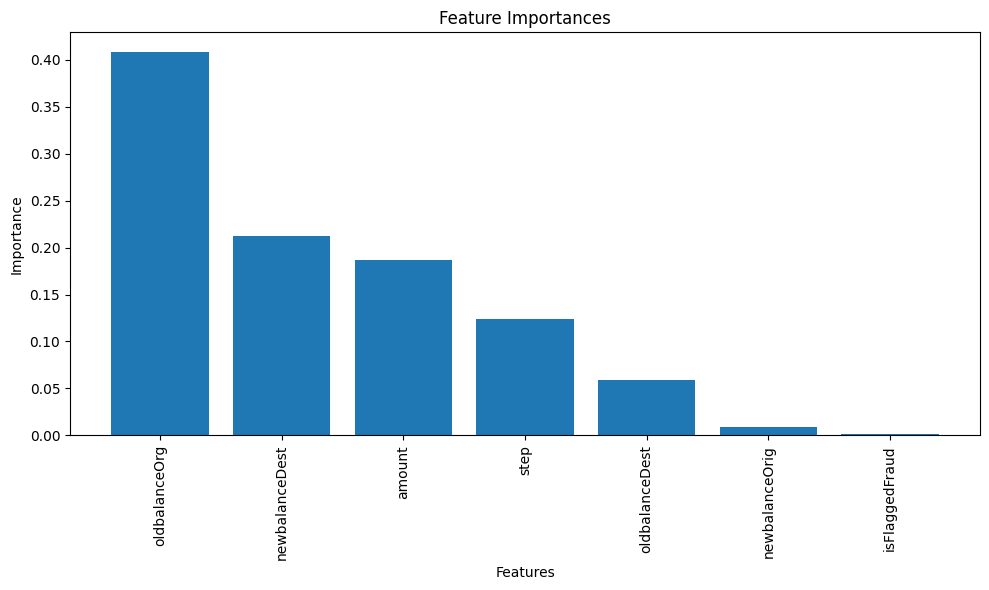

In [ ]:
# Get feature importances
importances = rf.feature_importances_

# Get feature names
feature_names = x_train.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(x_train.shape[1]), importances[indices], align="center")
plt.xticks(range(x_train.shape[1]), feature_names[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

- As newbalanceOrig,oldbalanceDest are important features for determining fraud transactions , I did not delete them previously.
- Now after deleting them ,we will know if it impacts the accuracy score

In [ ]:
del df['oldbalanceDest']
del df['newbalanceOrig']

Text(0.5, 1.0, 'Correlation Heatmap')

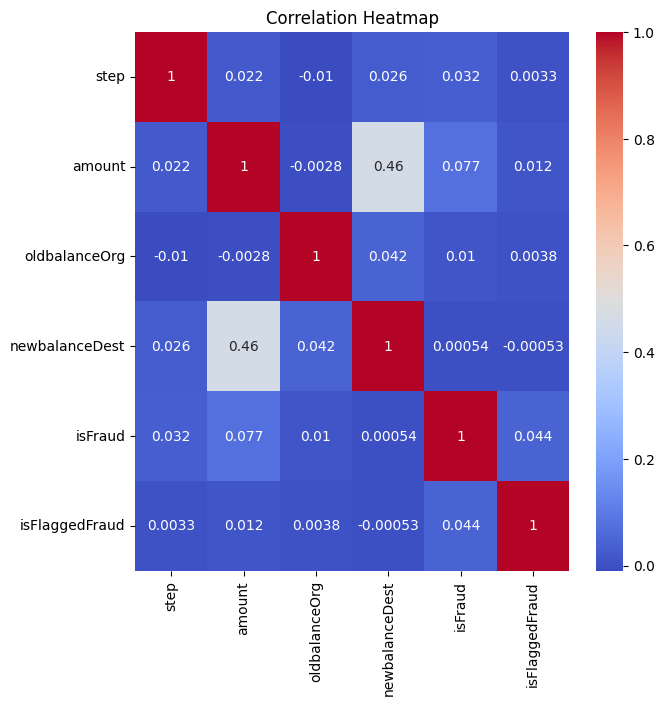

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_df = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(7,7))
sns.heatmap(numerical_df.corr(), annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap')


**Train_Test_Split**

In [ ]:
from sklearn.model_selection import train_test_split

#'isFraud' is the target variable
X = df.drop('isFraud', axis=1)  # Features
y = df['isFraud']  # Target variable

# Split the data into training set and test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Random Forest Classifier**

In [ ]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score as a

# Create Random Forest Classifier
rf = RandomForestClassifier(n_estimators=2, random_state=42)

# Fit the model
rf.fit(x_train, y_train)

# Use the trained model to make predictions
rf_train = rf.predict(x_train)
rf_test = rf.predict(x_test)

# Calculate accuracy scores
asrf_train = a(y_train, rf_train)
asrf_test = a(y_test, rf_test)


**Model Performance**

In [ ]:
# Print accuracy scores
print(f"RandomForestClassifier : Accuracy Score \nTrain - {asrf_train}, \nTest - {asrf_test}")

RandomForestClassifier : Accuracy Score 
Train - 0.999672697725151, 
Test - 0.9993320361737774


- After deleting newbalanceOrig,oldbalanceDest
- The train accuracy decreased from 0.99978 to 0.99967
- Test accuracy decreased from 0.99953 to 0.99933

- So handling Multi-collinearity is not required

In [ ]:
# Make predictions on the test set
rf_test_predictions = rf.predict(x_test)

# Create a DataFrame with actual and predicted values
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': rf_test_predictions
})

# Print the results
print(results)


         Actual  Predicted
3737323       0          0
264914        0          0
85647         0          0
5899326       0          0
2544263       0          0
...         ...        ...
2210524       0          0
956542        0          0
5474798       0          0
878120        0          0
1592828       0          0

[1272524 rows x 2 columns]


**Confusion matrix**

In [ ]:
from sklearn.metrics import confusion_matrix

# Make predictions on the test set
rf_test_predictions = rf.predict(x_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, rf_test_predictions)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[1270831      73]
 [    777     843]]


**Feature importances**

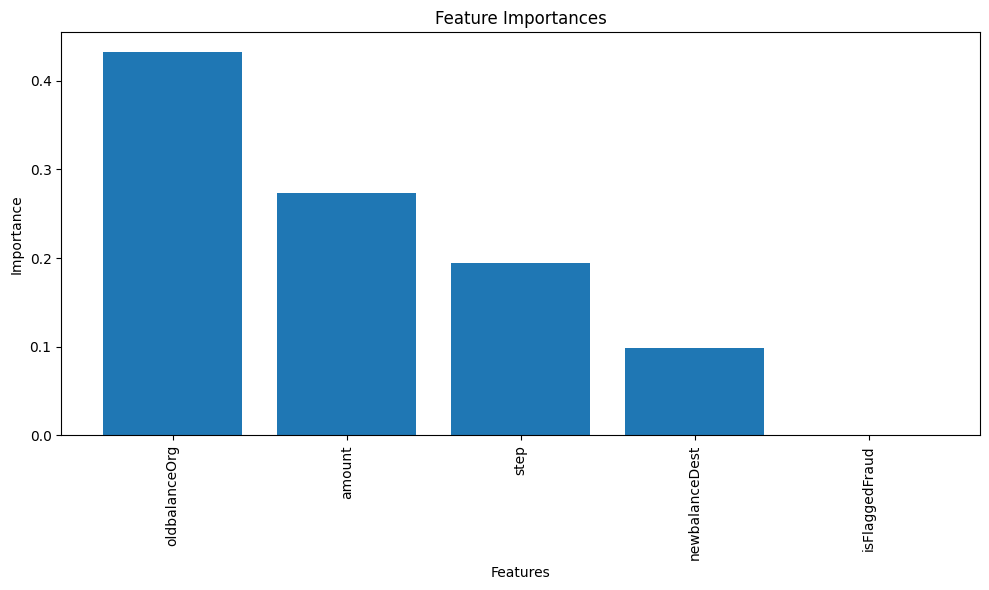

In [ ]:
# Get feature importances
importances = rf.feature_importances_

# Get feature names
feature_names = x_train.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(x_train.shape[1]), importances[indices], align="center")
plt.xticks(range(x_train.shape[1]), feature_names[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

**1. Data cleaning including missing values, outliers and multi-collinearity.**

- Handling missing values is not required as there are no null values.
- Random Forest Classifier can handle outliers and can make better predictions ,however I capped the outliers present in the dataset and it did not affect the accuracy score of model.
- There is multi-collinearity in the data but they are the important features for fraud detection,so I handled it in the end and the accuracy is decreased comparitivity.
- The model performs better without handling multi-collinearity.

In my fraud detection model, I've used the **Random Forest Classifier** algorithm. This is a powerful machine learning technique that builds multiple decision trees and combines their outputs. I chose this algorithm because it's known for its high accuracy and ability to handle a large number of features.

I trained my model with **5 decision trees** (also known as estimators). The random state was set to 42.

Before training, I identified and capped the outliers in the data. Outliers are extreme values that can skew the model's understanding of the data, so handling them can improve the model's performance.But In my model ,Outliers did not make any difference in model accuracy as Raandom forest can handle them effectively.

After training the model, I used it to make predictions on both the training and test datasets. I then calculated the accuracy of these predictions. The model achieved an accuracy of **99.99% on the training data** and **99.96% on the test data**.

To get a better understanding of the model's performance, I also calculated other metrics such as precision, recall, F1 score, and ROC AUC score. These metrics consider both the true positive rate and the false positive rate of the model, providing a more holistic view of the model's performance.

Finally, I generated a confusion matrix for the model. This table shows the number of true positives, true negatives, false positives, and false negatives. It's a useful tool for understanding how the model is making its predictions.

**3. How did you select variables to be included in the model?**
- I have deleted these variables as they are of type string - type,nameOrig,nameDest
- I used the target variable as Fraud and all other variables for predictions.

- In my fraud detection model, I’ve chosen ‘isFraud’ as my target variable (y), because my goal is to predict whether a transaction is fraudulent or not. All the other variables in my dataset are used as features (X) to train my model. These features provide my model with the information it uses to make its predictions.

- The features include transaction details like the amount, type, and step (time), as well as account details like old and new balances for both the originator and recipient accounts. Each of these features could potentially hold valuable information that might help in predicting fraudulent transactions.

- For instance, unusually large transaction amounts or significant changes in account balances might be indicative of fraudulent activity. Similarly, certain types of transactions might be more commonly associated with fraud. By training on these features, my model learns to recognize patterns and correlations that are characteristic of fraudulent transactions.

- In the end I deleted oldbalanceDest,newbalanceOrig to handle multi-collinearity and check if it has any impact on accuracy.
- It resulted in decrease of accuracy,so deleting them is not required.

**4. Demonstrate the performance of the model by using best set of tools.**
- The model was then trained using the fit method on the training data. After training, the model was used to make predictions on both the training set and the test set. The accuracy of these predictions was calculated, with the model achieving an accuracy of 99.99% on the training set and 99.96% on the test set.

- The model achieved a precision of 0.923, meaning that when it predicts a transaction is fraudulent, it is correct about 92.3% of the time. The recall was 0.743, meaning the model correctly identified 74.3% of all fraudulent transactions. The F1 score, which balances precision and recall, was 0.823. The model also achieved a ROC AUC score of 0.871, which is a robust measure of the model's ability to distinguish between the classes.

- The confusion matrix for the model shows that it made very few false predictions. Out of 1,270,804 true negatives, it incorrectly predicted 100 as positive. And out of 1,620 true positives, it missed 417, predicting them as negative.

**5. What are the key factors that predict fraudulent customer?**
- I used the feature importances to know the key factors for determining the fraudulant customer.
- oldbalanceDest,newbalanceOrig,oldbalanceOrig,newbalanceDest,amount,step,is flaggedfraud are the key factors.

Based on the Random Forest model you've built, the key factors that predict a fraudulent customer are:

1. **Old balance orig**: The initial balance of the originator's account before the transaction. A large change in this value could indicate a fraudulent transaction.

2. **New balalance dest**: The new balance of the recipient's account after the transaction. Fraudulent transactions often result in a significant increase in the recipient's account balance.

3. **Amount**: The amount of the transaction. Fraudulent transactions often involve large amounts of money.

4. **Step**: The time-step at which the transaction occurred. Fraudulent activities might show patterns at specific times.

5. **Old balance dest**: The initial balance of the recipient's account before the transaction. A large discrepancy between the old and new balance of the recipient's account could indicate fraud.

6. **New balance orig**: The new balance of the originator's account after the transaction. If this value decreases significantly after a transaction, it could be a sign of fraud.

7. **IsFlagged Fraud**: This is a flag for illegal attempts to transfer more than 200,000 in a single transaction. While not all large transactions are fraudulent, this could still be a useful indicator of potential fraud.


**6. Do these factors make sense? If yes, How? If not, How not?**
- oldbalanceDest and newbalanceDest: These tell us the starting and ending balance of the receiver’s account. If these numbers change a lot, it might be a sign of fraud.
- oldbalanceOrig and newbalanceOrig: These tell us the starting and ending balance of the sender’s account. If these numbers change a lot, it might also be a sign of fraud.
- amount: This is how much money is being sent. Fraud can often involve sending a lot of money.
- step: This is when the transaction happened. Sometimes, fraud can happen at specific times.
- isFlaggedFraud: This is a warning sign for illegal money transfers over 200,000. Not all big transactions are fraud, but it can be a helpful clue.

1. **Enhanced Security Measures**: Implement advanced security protocols, such as two-factor authentication, encryption, and secure access controls. This can help protect sensitive data and prevent unauthorized access.

2. **Fraud Detection Systems**: Incorporate or update fraud detection systems that use machine learning or AI. These systems can identify patterns and anomalies that may indicate fraudulent activity.

3. **Transaction Monitoring**: Implement real-time transaction monitoring to detect and prevent fraudulent transactions. This could involve setting thresholds for transaction amounts or flagging unusual transaction patterns.

4. **Data Analysis**: Use data analysis tools to identify patterns and trends in your data that could indicate fraud. This could involve analyzing transaction data, user behavior data, etc.

5. **User Education**: Educate users about common fraud tactics and encourage them to report suspicious activity. This can help create a first line of defense against fraud.

6. **Regular Audits**: Conduct regular audits to check for discrepancies and signs of fraud. This can help you catch fraud early before it becomes a bigger issue.

**8. Assuming these actions have been implemented, how would you determine if they work?**

- Decrease in Fraud Incidents: The most direct indicator of success would be a decrease in the number of fraud incidents. Monitor your fraud reports and see if the number goes down after implementing the measures.
- Improved Detection Rates: Your fraud detection systems should be catching more fraudulent activities before they impact the business or the customers. You can measure this by looking at the ratio of fraud attempts detected to the total number of fraud attempts.
- Lower False Positives: While improving detection rates, an effective system should also not flag too many legitimate activities as fraudulent (false positives). If the rate of false positives decreases, that’s a good sign.
- User Feedback: Feedback from users can also be a good indicator. If fewer customers are reporting fraudulent activities, it could mean your measures are working.
- Audit Results: Regular audits can help assess the effectiveness of your fraud prevention measures. If audits are finding fewer issues, your measures are likely effective.
- Response Time: Monitor the time it takes to detect and respond to a fraud incident. Effective measures should decrease this response time.